<a href="https://colab.research.google.com/github/Saulo-Azevedo/TCC_POS_PUC/blob/main/Tcc__Desenvolvimento_de_um_Sistema_de_Preven%C3%A7%C3%A3o_de_Spam_em_E_mails_Utilizando_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de Prevenção de Spam em E-mails Utilizando Machine Learning .
Classificação de SMS Spam: Detectando Mensagens Não Desejadas.


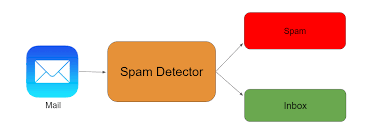

## 1.  Introução

Os dados utilizados neste estudo foram coletados a partir do conjunto de dados SMS Spam Collection Dataset disponível no site Kaggle.
Esse conjunto de dados consiste em uma coleção de mensagens de texto em inglês, classificadas como spam ou não-spam, e foi coletado para fins de pesquisa em detecção de spam em mensagens de texto.
O objetivo deste estudo foi identificar mensagens de spam ou não-spam em uma lista de e-mails, utilizando o conjunto de dados mencionado. Vale ressaltar que os dados foram obtidos da última vez que a informação foi atualizada até janeiro de 2022, e o link específico para o conjunto de dados pode ser acessado diretamente na fonte original no site Kaggle.

## 2.  Descrição do Problema e da Solução Proposta:

O objetivo principal deste notebook é desenvolver um modelo preditivo que classifique com precisão as mensagens SMS recebidas como "ham" (legítimas) ou "spam". Utilizaremos o conjunto de dados da Coleção de Spam em Mensagens de SMS, que contém 5.574 mensagens SMS rotuladas com suas respectivas categorias.




## 3. Coleta e verificação dos dados a serem utilizados na analise:

Os dados utilizados neste estudo foram coletados a partir do conjunto de dados SMS Spam Collection Dataset disponível no site Kaggle.
Esse conjunto de dados consiste em uma coleção de mensagens de texto em inglês, classificadas como spam ou não-spam, e foi coletado para fins de pesquisa em detecção de spam em mensagens de texto.
O conjunto inclui várias subcoleções de mensagens, cada uma proveniente de fontes distintas.

**Data e Link de Aquisição:**

Os dados foram obtidos entre Dezembro de 2023 a Janeiro de 2024,a última vez que a informação foi atualizada foi janeiro de 2022, esse é link específico para o conjunto de dados disponível neste contexto (https://archive.ics.uci.edu/dataset/228/sms+spam+collection).

**Formato e Estrutura do Dataset:**

O conjunto de dados está estruturado em arquivos de texto, com uma mensagem por linha. Cada linha possui duas colunas: a primeira (v1) contém a etiqueta da mensagem (ham ou spam), e a segunda (v2) contém o texto bruto da mensagem.
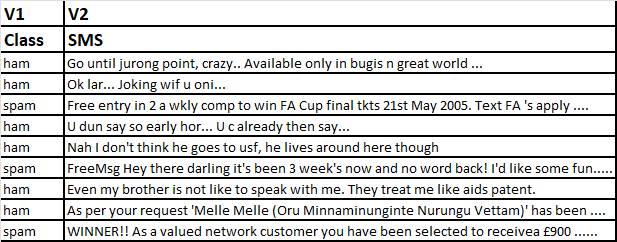

**Relacionamento entre Datasets:**

Os diferentes conjuntos de dados (Grumbletext, NSC, Caroline Tag's Thesis, SMS Spam Corpus v.0.1 Big) foram combinados para formar o conjunto abrangente utilizado para a pesquisa sobre spam em mensagens de SMS.



A seguir, são apresentados os detalhes de cada fonte de dados:

*   Grumbletext Web Site: Contém 425 mensagens de spam de SMS extraídas manualmente do site, que é um fórum do Reino Unido onde usuários de telefones celulares compartilham reclamações sobre mensagens de spam em SMS
http://www.grumbletext.co.uk/

*   NUS SMS Corpus (NSC): Consiste em um subconjunto de 3.375 mensagens legítimas (ham) escolhidas aleatoriamente de um corpus maior, composto por cerca de 10.000 mensagens legítimas coletadas para pesquisa no Departamento de Ciência da Computação da Universidade Nacional de Singapura.
http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/

*  Caroline Tag's PhD Thesis: Fornece uma lista adicional de 450 mensagens legítimas (ham) coletadas da tese de doutorado de Caroline Tag.
http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf

*	SMS Spam Corpus v.0.1 Big: Por fim, o conjunto de dados incorpora o SMS Spam Corpus v.0.1 Big, que contém 1.002 mensagens legítimas (ham) e 322 mensagens de spam. Esse corpus está disponível publicamente.
http://www.esp.uem.es/jmgomez/smsspamcorpus/




## 3.1 Importando bibliotecas a serem utilizadas:

In [ ]:
# Importação de Bibliotecas Necessárias
import numpy as np # Para operações numéricas
import pandas as pd # Para manipulação e análise de dados
import matplotlib.pyplot as plt # Para visualização de dados
%matplotlib inline

#Importação do WordCloud para visualização de texto
from wordcloud import WordCloud

# Importação do NLTK para processamento de linguagem natural
import nltk
from nltk.corpus import stopwords # Para palavras irrelevantes (stopwords)

# Download dos dados do NLTK
nltk.download('stopwords') # Download dos dados de stopwords
nltk.download('punkt') # Download dos dados do tokenizador

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 3.1 Lendo o arquivo CSV que contém os dados:


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tcc PUC/spam.csv', encoding='latin1')

In [ ]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#035afc")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


# 4. Processamento/Tratamento de Dados



## 4.1 | Exibindo informações do Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 4.2 |Removendo Colunas

In [ ]:
# Removendo as colunas com rótulos “Unnamed: 2”, “Unnamed: 3” e “Unnamed: 4”
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#035afc"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## 4.3 | Renomeando colunas

In [ ]:
 # Usando metodo .rename() para renomear colunas do DataFrame df
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

## 4.4 | Convertendo os rótulos da coluna “target”

In [ ]:
#  Convertendo os rótulos da coluna “target” em valores numéricos
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
styled_df = df.head().style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#035afc"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


## 4.5 | Verificação de Valores Ausentes

In [ ]:
# Usando metodo .isnull() para verificar valores ausentes
df.isnull().sum()

target    0
text      0
dtype: int64

## 4.6 | Verificando valores duplicados

In [ ]:
# Usando metodo .duplicate() para checar valores duplicados
df.duplicated().sum()

403

## 4.7 |Removendo valores duplicados

In [ ]:
# Usando metodo .drop_duplicates() para remover valores duplicados
df = df.drop_duplicates(keep = 'first')

## 4.8 | Checando formato do Dataset

In [ ]:
# Usando metodo .shape() para identificar os dados em termos de número de linhas e colunas
df.shape

(5169, 2)

# 5. EDA (Análise e Exploração dos Dados)

5.1 | Percentual de Mensagens HAM e Spam

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


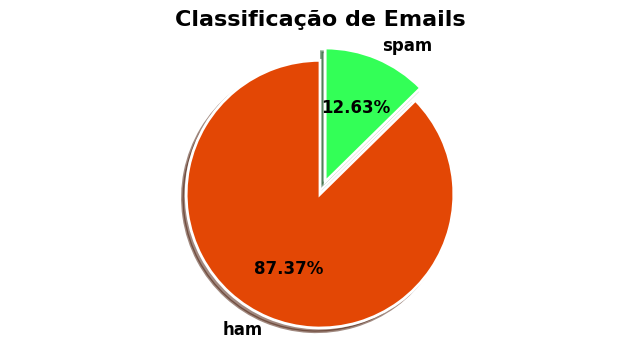

In [ ]:
import matplotlib.pyplot as plt

# Dados de exemplo
# valores = [75, 25]  # Valores de exemplo para 'ham' e 'spam'

# Define cores personalizadas
colors = ['#e34705', '#33FF57']

# Define o parâmetro explode para criar um espaço entre as fatias
explode = (0, 0.1)  # Explode a segunda fatia (spam) em 10%

# Cria uma figura com fundo branco
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_facecolor('white')

# Cria o gráfico de pizza com cores personalizadas, rótulos, parâmetro explode e sombra
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Aplica o parâmetro explode
    shadow=True  # Adiciona sombra
)

# Personaliza as propriedades do texto
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')

# Adiciona um título
ax.set_title('Classificação de Emails', fontsize=16, fontweight='bold')

# A proporção igual garante que a pizza seja desenhada como um círculo
ax.axis('equal')

# Mostra o gráfico de pizza
plt.show()

5.2 | Análise do Comprimento e Estrutura do Texto

In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


5.3 | Estatísticas Resumidas para Mensagens Legítimas (Ham):

In [ ]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


5.4 | Estatísticas Sumárias para Mensagens de Spam:


In [ ]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


5.5 | Distribuição do comprimento dos caracteres para mensagens legítimas e spam

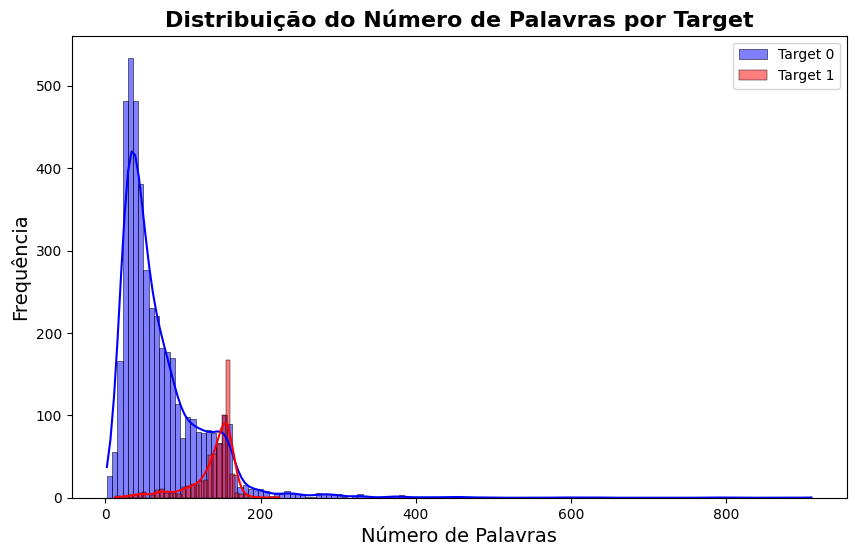

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma figura e define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plota o histograma para o alvo 0 em azul
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plota o histograma para o alvo 1 em vermelho
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Adiciona rótulos e um título
plt.xlabel('Número de Palavras', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Distribuição do Número de Palavras por Target', fontsize=16, fontweight='bold')

# Adiciona uma legenda
plt.legend()

# Personaliza a aparência do gráfico
sns.set(style='whitegrid')  # Adiciona um fundo de grade branca

# Mostra o gráfico
plt.show()

5.6 | Distribuição da contagem de palavras para mensagens legítimas e spam

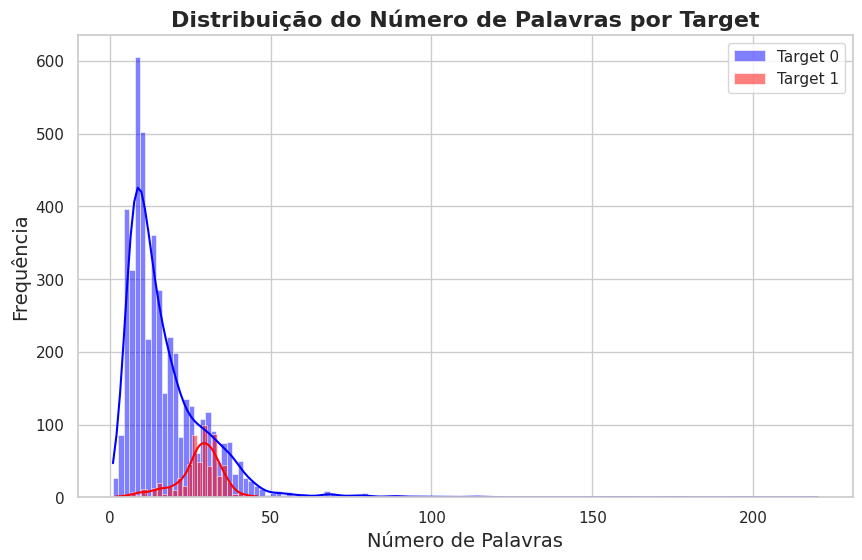

In [ ]:
# Cria uma figura e define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plota o histograma para o alvo 0 em azul
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plota o histograma para o alvo 1 em vermelho
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Adiciona rótulos e um título
plt.xlabel('Número de Palavras', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Distribuição do Número de Palavras por Target', fontsize=16, fontweight='bold')

# Adiciona uma legenda
plt.legend()

# Personaliza a aparência do gráfico
sns.set(style='whitegrid')  # Adiciona um fundo de grade branca

# Mostra o gráfico
plt.show()

5.7 | Pairplot para visualização de dados

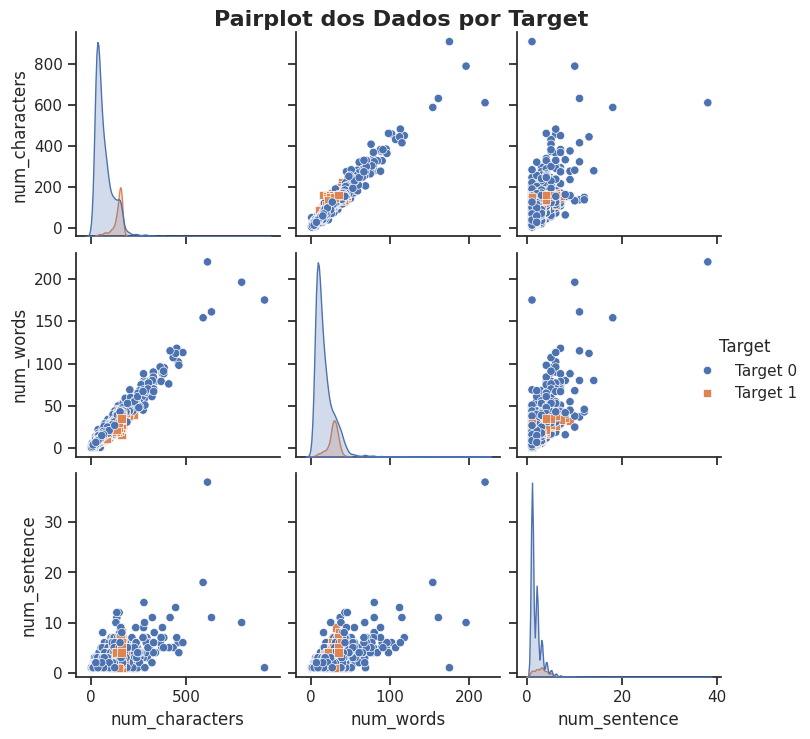

In [ ]:
# Cria um pairplot com estilização personalizada
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Define um título para o pairplot
g.fig.suptitle("Pairplot dos Dados por Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Ajusta a posição do título

# Personaliza a legenda
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Mostra o pairplot
plt.show()

5.8 Correlação entre Variáveis:

In [ ]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


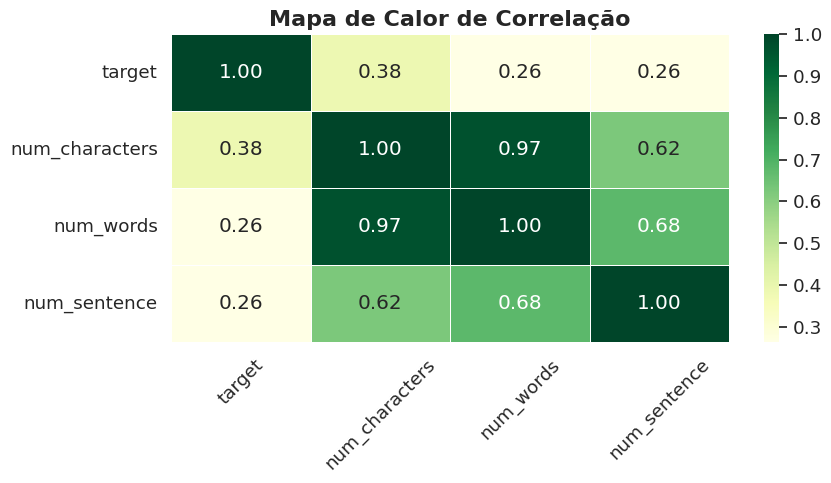

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona as colunas para a matriz de correlação
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Cria um mapa de calor com estilização personalizada
plt.figure(figsize=(9  , 4))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', linewidths=0.5, fmt=".2f")

# Define um título para o mapa de calor
plt.title("Mapa de Calor de Correlação", fontsize=16, fontweight='bold')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostra o mapa de calor
plt.show()


# 6. Pré-processamento de dados

6.1 Pré-processamento dos Dados:

In [ ]:
# Importando o Stemmer Porter para redução de palavras
from nltk.stem.porter import PorterStemmer

# Importando o módulo string para lidar com caracteres especiais
import string

# Criando uma instância do Stemmer Porter
ps = PorterStemmer()

# Função de pré-processamento e transformação para minúsculas
def transform_text(text):
    # Transforma o texto em minúsculas
    text = text.lower()

    # Tokenização usando NLTK
    text = nltk.word_tokenize(text)

   # Remoção de caracteres especiais
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Remoção de stopwords e pontuação
    text = y[:]
    y.clear()

    # Loop pelos tokens e remove stopwords e pontuação
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming (Redução de palavras usando Stemmer Porter)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Juntando os tokens processados de volta em uma única string
    return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

6.1 | Criação de uma nova coluna: 'transformed_text'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
styled_df = df.head(5).style

# Modificando a cor e a cor de fundo dos cabeçalhos da tabela (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#035afc"), ('font-weight', 'bold')]}
])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


6.2 Nuvem de palavras para mensagens de spam

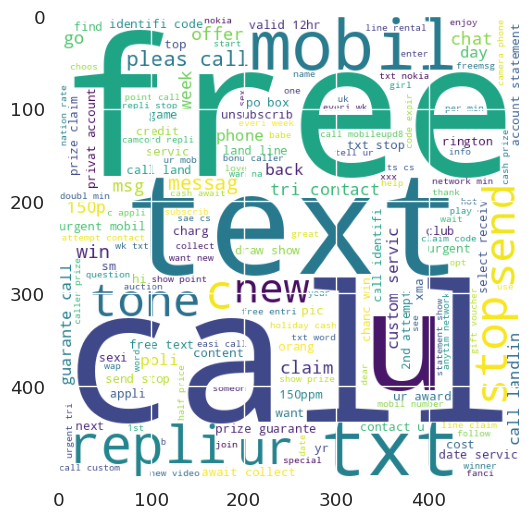

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

6.2.1 Nuvem de palavras para mensagens não spam

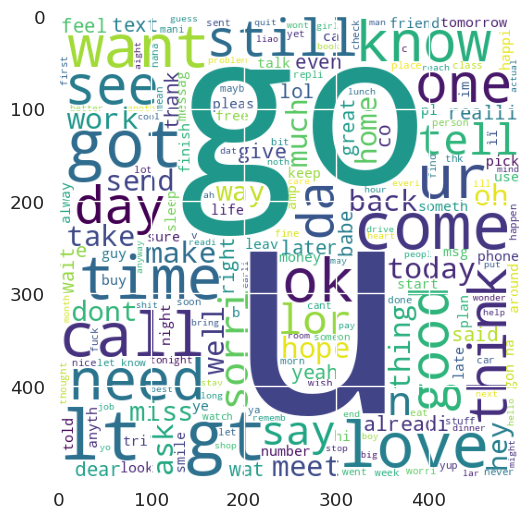

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

6.3 | Encontrando as 30 palavras mais frequentes em mensagens de Spam

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-34-199327f44fae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette="husl")


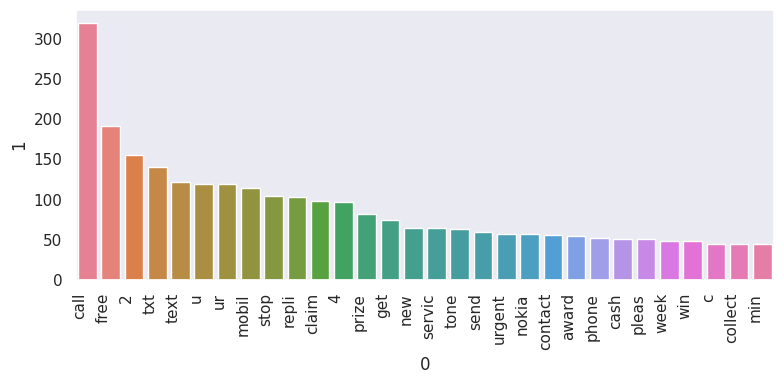

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set(style="dark")
plt.figure(figsize=(8  , 4))

# Criar o gráfico de barras
sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette="husl")

# Rotacionando os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=90, ha="right")

# Ajustando o layout para evitar que os rótulos do eixo x se sobreponham
plt.tight_layout()

# Mostrar o gráfico
plt.show()


6.4 | Encontrando as 30 palavras  principais das mensagens não spam

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-37-959673278883>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'crest')


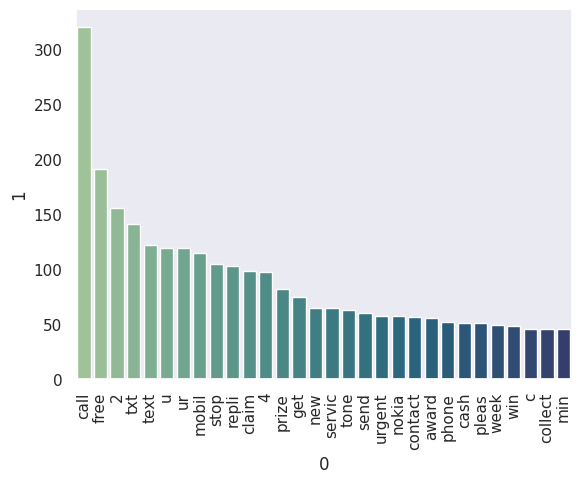

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'crest')
plt.xticks(rotation = 90)
plt.show()

# 7. Construção do Modelo
Aplicação de Modelos de Aprendizado de Máquina

7.1 | Inicializando CountVectorizer e TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

7.2 | Variável Dependente e Independente

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

7.3 | Dividindo em Dados de Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

7.4 | Importando os Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

7.5 | Inicializando os Modelos

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

7.6 | Dicionário dos Modelos

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

7.7 |Treinando os Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

# 8. Avaliando os modelos

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9709864603481625
Precision:  1.0

For:  DT
Accuracy:  0.9323017408123792
Precision:  0.8333333333333334

For:  LR
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697

For:  RF
Accuracy:  0.97678916827853
Precision:  0.975

For:  Adaboost
Accuracy:  0.9690522243713733
Precision:  0.9732142857142857

For:  Bgc
Accuracy:  0.9593810444874274
Precision:  0.8692307692307693

For:  ETC
Accuracy:  0.9777562862669246
Precision:  0.967479674796748

For:  GBDT
Accuracy:  0.9506769825918762
Precision:  0.9306930693069307

For:  xgb
Accuracy:  0.9680851063829787
Precision:  0.9338842975206612


<ipython-input-46-f4dbddc24fa0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Accuracy', x='Classifier', data=df_results, palette='viridis')
<ipython-input-46-f4dbddc24fa0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Precision', x='Classifier', data=df_results, palette='Paired')


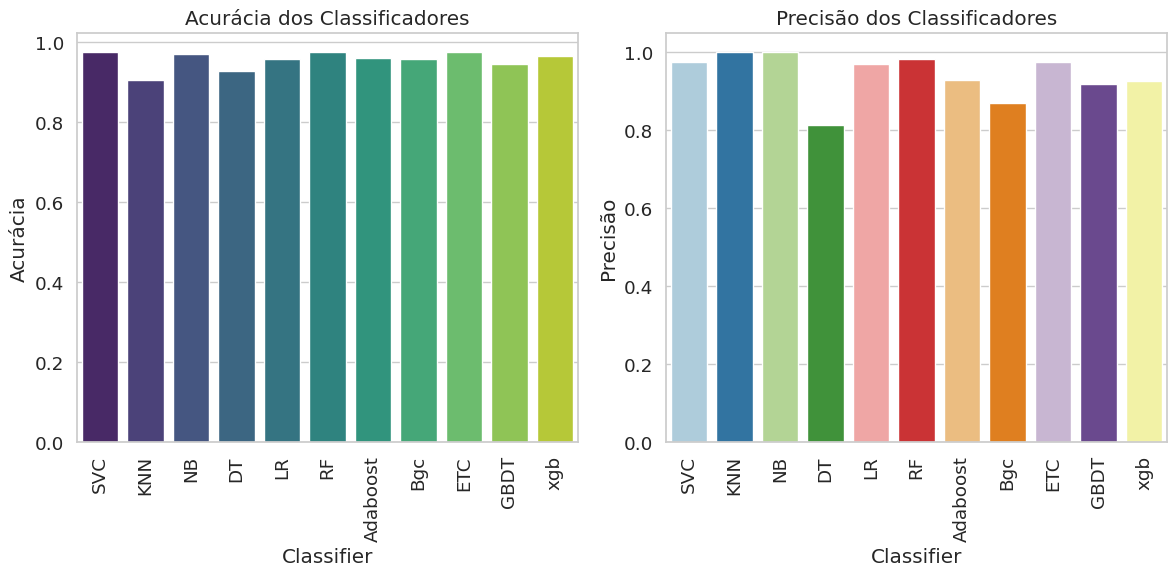

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados
classifiers = ['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'Adaboost', 'Bgc', 'ETC', 'GBDT', 'xgb']
accuracy_scores = [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354, 0.960348162475822, 0.9584139264990329, 0.9748549323017408, 0.9468085106382979, 0.9671179883945842]
precision_scores = [0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703, 0.9829059829059829, 0.9292035398230089, 0.8682170542635659, 0.9745762711864406, 0.9191919191919192, 0.9262295081967213]

# Criando DataFrame
df_results = pd.DataFrame({
    'Classifier': classifiers,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Configuração do estilo
sns.set(style="whitegrid", font_scale=1.2)

# Reduzindo tamanho da figura em 25%
plt.figure(figsize=(12, 6))

# Criando gráfico de barras vertical para Acurácia
plt.subplot(1, 2, 1)
sns.barplot(y='Accuracy', x='Classifier', data=df_results, palette='viridis')
plt.title('Acurácia dos Classificadores')
plt.ylabel('Acurácia')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x

# Criando gráfico de barras vertical para Precisão
plt.subplot(1, 2, 2)
sns.barplot(y='Precision', x='Classifier', data=df_results, palette='Paired')
plt.title('Precisão dos Classificadores')
plt.ylabel('Precisão')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x

# Ajustando o layout para evitar sobreposições
plt.tight_layout()

# Mostrando o gráfico
plt.show()



# 9. Conclusão


Conclusão: Após analisarmos os diversos algoritmos de classificação, destacamos os seguintes pontos:

Após examinar cuidadosamente os dados e testar vários modelos de Machine Learning para identificar e-mails spam, constata-se resultados promissores que evidenciam a eficiência dessas técnicas na solução do desafio cada vez mais presente da segurança cibernética.

Os modelos SVC e  Random Forest (RF) se destacaram como principais, com precisões em torno de 97,58%, evidenciando uma importante habilidade para diferenciar e-mails autênticos de spam.

Estes resultados, juntamente com a precisão e eficiência computacional desses modelos, indicam que eles são excelentes opções para serem utilizados em sistemas de combate ao spam em empresas e em segurança cibernética.

Contudo, é crucial ressaltar que outros modelos, tais como Naive Bayes (NB), Gradient Boosting, Adaboost, Regressão Logística e Bagging Classifier, também demonstraram desempenho competitivo, com acurácias variando de 94,68% a 96,03%. Estes tipos apresentam uma opção útil para empresas que procuram uma forma eficaz de evitar spam, levando em conta não só a precisão, mas também a eficácia computacional e outras considerações práticas.

Para concluir, os resultados deste estudo oferecem uma fundação robusta para a introdução de sistemas de proteção contra spam com base em Aprendizado de Máquina, auxiliando na proteção e preservação das comunicações por e-mail em ambientes de negócios e segurança digital. Estes achados evidenciam o potencial de transformação dessas técnicas na defesa contra ameaças de segurança cibernética e enfatizam a necessidade constante de pesquisa e inovação nesse campo em constante mudança.